Epoch 0, Loss: 0.481682
Epoch 10, Loss: 0.258768
Epoch 20, Loss: 0.243408
Epoch 30, Loss: 0.236702
Epoch 40, Loss: 0.232690
Epoch 50, Loss: 0.229560
Epoch 60, Loss: 0.226699
Epoch 70, Loss: 0.223891
Epoch 80, Loss: 0.221057
Epoch 90, Loss: 0.218167
Epoch 100, Loss: 0.215211
Epoch 110, Loss: 0.212184
Epoch 120, Loss: 0.209082
Epoch 130, Loss: 0.205902
Epoch 140, Loss: 0.202639
Epoch 150, Loss: 0.199289
Epoch 160, Loss: 0.195847
Epoch 170, Loss: 0.192309
Epoch 180, Loss: 0.188670
Epoch 190, Loss: 0.184927
Epoch 200, Loss: 0.181077
Epoch 210, Loss: 0.177119
Epoch 220, Loss: 0.173053
Epoch 230, Loss: 0.168882
Epoch 240, Loss: 0.164610
Epoch 250, Loss: 0.160240
Epoch 260, Loss: 0.155782
Epoch 270, Loss: 0.151244
Epoch 280, Loss: 0.146637
Epoch 290, Loss: 0.141975
Epoch 300, Loss: 0.137271
Epoch 310, Loss: 0.132542
Epoch 320, Loss: 0.127808
Epoch 330, Loss: 0.123086
Epoch 340, Loss: 0.118399
Epoch 350, Loss: 0.113766
Epoch 360, Loss: 0.109210
Epoch 370, Loss: 0.104750
Epoch 380, Loss: 0.1004

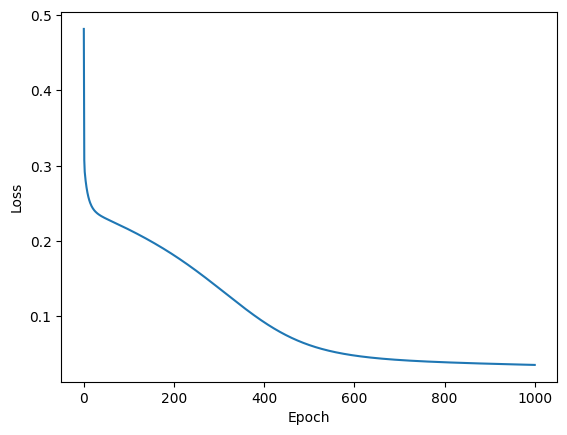

In [7]:
import numpy as np
import matplotlib.pyplot as plt


#產生資料
x,y,anses=np.zeros(20000),np.zeros(20000),np.zeros(20000)

for i in range(20000):
  x[i] = np.random.uniform(-0.5, 0.2) if np.random.rand() < 0.5 else np.random.uniform(0.8, 1.5)
  y[i] = np.random.uniform(-0.5, 0.2) if np.random.rand() < 0.5 else np.random.uniform(0.8, 1.5)
  if x[i]>=-0.5 and x[i]<=0.2:
      x_out=0
  else:
      x_out=1
  if y[i]>=-0.5 and y[i]<=0.2:
      y_out=0
  else:
      y_out=1
      
  if x_out != y_out:
      anses[i]=1
X = [[a, b] for a, b in zip(x, y)]
X =np.array(X)
#print(type(X[0]))
#print(X[0])
#print('anses',anses)


# 定义线性激活函数
def linear(x):
    return x

def linear_derivative(x):
    return 1
def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size
# 修改数据正则化函数
def normalize_data(X):
    X_normalized = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return X_normalized
# 定义 TanH 激活函数
def tanh(x):
    return np.tanh(x)
def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # 初始化权重和偏置
        limit_input_hidden = np.sqrt(6 / (input_size + hidden_size))
        self.weights_input_hidden = np.random.uniform(-limit_input_hidden, limit_input_hidden, (input_size, hidden_size))
        self.bias_input_hidden = np.zeros((1, hidden_size))
        
        limit_hidden_output = np.sqrt(6 / (hidden_size + output_size))
        self.weights_hidden_output = np.random.uniform(-limit_hidden_output, limit_hidden_output, (hidden_size, output_size))
        self.bias_hidden_output = np.zeros((1, output_size))
    def forward(self, X):
        # 前向传播
        self.input_to_hidden = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.input_to_hidden_act = tanh(self.input_to_hidden)
        self.hidden_to_output = np.dot(self.input_to_hidden_act, self.weights_hidden_output) + self.bias_hidden_output
        self.output = linear(self.hidden_to_output)
        return self.input_to_hidden,self.input_to_hidden_act,self.hidden_to_output,self.output
    def predict(self, X):
        a,b,c,output=self.forward(X)
        return output    
    def backward(self, X, y, z1, a1, z2, y_pred, W2):
        dloss_doutput = mse_loss_derivative(y, y_pred)
        doutput_dz2 = linear_derivative(z2)
        
        dz2_dW2 = a1
        dz2_db2 = 1
        dz2_da1 = W2
        
        da1_dz1 = tanh_derivative(z1)
        dz1_dW1 = X
        dz1_db1 = 1
        
        dloss_dz2 = dloss_doutput * doutput_dz2
        dloss_da1 = np.dot(dloss_dz2, W2.T)
        dloss_dz1 = dloss_da1 * da1_dz1
        
        dloss_dW2 = np.dot(dz2_dW2.T, dloss_dz2)
        dloss_db2 = np.sum(dloss_dz2 * dz2_db2, axis=0, keepdims=True)
        dloss_dW1 = np.dot(dz1_dW1.T, dloss_dz1)
        dloss_db1 = np.sum(dloss_dz1 * dz1_db1, axis=0, keepdims=True)
        
        return dloss_dW1, dloss_db1, dloss_dW2, dloss_db2
    
    def train(self, X, y, learning_rate, num_epochs):
        y = y.reshape(-1, 1)  # 確保 y 的形狀是 (n, 1)
        self.loss_history = []
        
        for epoch in range(num_epochs+1):
            # 前向传播
            z1, a1, z2, y_pred = self.forward(X)
            #print("y_pred",y_pred)
            '''
            if y_pred >= 0.5:
                y_pred=1
            elif y_pred < 0.5:
                y_pred=0
            '''
            # 计算误差
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)
            
            # 計算梯度
            dW1, db1, dW2, db2 = self.backward(X, y, z1, a1, z2, y_pred, self.weights_hidden_output)
            #print(dW1.shape)
            # 更新權重和偏差
            self.weights_hidden_output -= learning_rate * dW2
            self.bias_hidden_output -= learning_rate * db2
            self.weights_input_hidden -= learning_rate * dW1
            self.bias_input_hidden -= learning_rate * db1
            
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.6f}')
        
        plt.plot(self.loss_history)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()
'''
# 创建XOR数据集
X, y = generate_xor_dataset(10000)
'''
# 数据正则化
X_normalized = normalize_data(X)

# 切分数据集为训练集和测试集
split_ratio = 0.8
split_index = int(len(X_normalized) * split_ratio)
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = anses[:split_index], anses[split_index:]

# 创建神经网络模型
input_size = 2
hidden_size = 2
output_size = 1
num_epochs = 1000
learning_rate = 0.1

# 创建模型
model = NeuralNetwork(input_size, hidden_size, output_size)
#print(type(X_train))
# 训练模型
model.train(X_train, y_train, learning_rate, num_epochs)


In [8]:
my_array = np.array([0.8, 0.1])
print(model.predict(my_array))

[[0.96147352]]


In [6]:
import numpy as np

def generate_xor_dataset(num_samples):
    X1 = np.random.uniform(-0.5, 0.2, size=(num_samples // 2, 2))
    X2 = np.random.uniform(0.8, 1.5, size=(num_samples // 2, 2))
    X = np.vstack((X1, X2))

    y1 = np.zeros(num_samples // 2)
    y2 = np.ones(num_samples // 2)
    y = np.hstack((y1, y2))

    return X, y


In [9]:
A,B=generate_xor_dataset(10)

In [10]:
print(A)
print(B)

[[ 2.98191477e-02  8.09848709e-02]
 [ 6.77541444e-02 -3.85819698e-01]
 [-3.45057754e-01 -4.28425703e-01]
 [-6.24022274e-02  1.06356997e-01]
 [ 9.70785680e-04 -2.39979913e-01]
 [ 9.90051244e-01  9.66412049e-01]
 [ 1.00647238e+00  1.28366014e+00]
 [ 1.12059535e+00  1.17349598e+00]
 [ 9.49786484e-01  1.14672741e+00]
 [ 1.16261640e+00  1.17569647e+00]]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [25]:
#產生資料
x,y,anses=np.zeros(20000),np.zeros(20000),np.zeros(20000)

for i in range(20000):
  x[i] = np.random.uniform(-0.5, 0.2) if np.random.rand() < 0.5 else np.random.uniform(0.8, 1.5)
  y[i] = np.random.uniform(-0.5, 0.2) if np.random.rand() < 0.5 else np.random.uniform(0.8, 1.5)
  if x[i]>=-0.5 and x[i]<=0.2:
      x_out=0
  else:
      x_out=1
  if y[i]>=-0.5 and y[i]<=0.2:
      y_out=0
  else:
      y_out=1
      
  if x_out == y_out:
      anses[i]=1
X = [[a, b] for a, b in zip(x, y)]
X =np.array(X)
print(X)
print(anses)

[[-0.08825263  0.13376032]
 [ 0.99176374 -0.38440393]
 [ 1.1075911  -0.48530675]
 ...
 [-0.18587734  0.90100165]
 [ 1.15842079  1.37394504]
 [-0.37258596 -0.42297352]]
[1. 0. 0. ... 0. 1. 1.]


In [19]:
print(x)
print(y)
X = [[a, b] for a, b in zip(x, y)]

[ 1.13684037  1.23478645 -0.30860514 ...  1.23257003 -0.08803653
  1.35966545]
[ 0.90571719  1.28458413  1.33288149 ... -0.11447733 -0.35458727
  0.15548256]


In [20]:
print(X)

[[1.1368403715959725, 0.9057171937649661], [1.2347864530271364, 1.2845841312859423], [-0.3086051434637014, 1.3328814889552425], [0.8930687184996249, 1.2888447589034553], [-0.02206981103722705, -0.4731688093553009], [-0.45662195745759737, 1.1244818538452268], [0.9658631756361798, 0.03456860714453347], [1.0377323237806553, -0.06409470145602708], [-0.0016813127832149277, -0.36575504117871077], [1.4002523103702371, 1.3821820521302342], [1.4185623244303078, 0.132458820641145], [0.9430853940733133, 1.2003863065657638], [-0.21191701542411961, -0.44786209695036255], [0.9116643557965768, -0.22269919531071242], [1.2225699780014618, 1.4359176871135855], [-0.4261823607947784, -0.03702491484034226], [-0.43379503616871373, 1.2518560843990905], [-0.3399535953655001, 0.17678264098975505], [-0.2819297490485817, 0.060580341524224646], [1.3453805684915559, 1.2750452869718711], [-0.4900288998940322, 1.4426754676977902], [-0.4990331435500409, 1.1873539916287434], [-0.16655226310831317, 1.0049260155395887],